# Normalization

Formula for Normalization: 

                          Xnorm = (Xi - Xmin) / (Xmax -Xmin ) 

In [290]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [260]:
df = pd.read_csv(r"C:\Users\Vaishnavi Daule\Downloads\archive (12)\Mall_Customers.csv" ,header = None ,usecols =[1,2,3] )
df.columns=['Gender','Age','Annual Income (k$)']

In [261]:
df = df.drop(index=0)

In [262]:
df.reset_index(drop=True, inplace=True)


In [263]:
df

,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17
...,...,...,...
195,Female,35,120
196,Female,45,126
197,Male,32,126
198,Male,32,137


# Ordinal Encoding
Because the gender column contains categorical values, we can perform ordinal encoding if we assume there's a natural order to the categories.

In [264]:
from sklearn.preprocessing import OrdinalEncoder


In [265]:
categories = [['Male', 'Female']]

In [266]:
oe= OrdinalEncoder(categories = ["Male","Female"])

In [267]:
encoder = OrdinalEncoder(categories=categories)


In [268]:
df['Gender_encoded'] = encoder.fit_transform(df[['Gender']])


In [269]:
df.drop(columns=['Gender'], inplace=True)


In [270]:
df

,Age,Annual Income (k$),Gender_encoded
0,19,15,0.0
1,21,15,0.0
2,20,16,1.0
3,23,16,1.0
4,31,17,1.0
...,...,...,...
195,35,120,1.0
196,45,126,1.0
197,32,126,0.0
198,32,137,0.0


In [271]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


<Axes: xlabel='Age', ylabel='Density'>

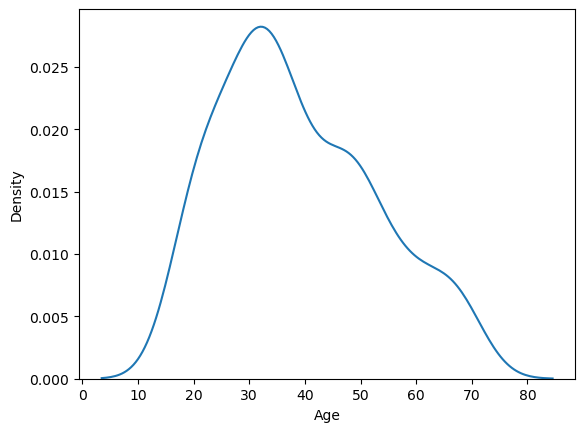

In [272]:
sns.kdeplot(df['Age'])


In [273]:
df['Annual Income (k$)'] = pd.to_numeric(df['Annual Income (k$)'], errors='coerce')

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

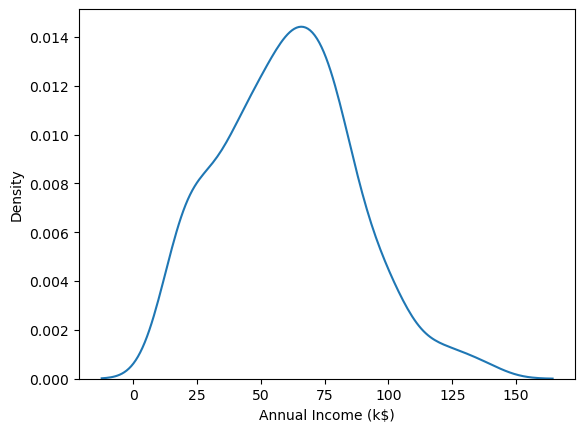

In [274]:
sns.kdeplot(df["Annual Income (k$)"])

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

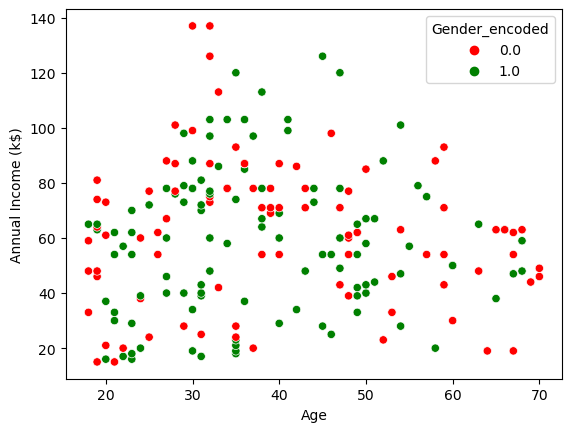

In [275]:
color_dict={0.0:'red',1.0:'green'}
sns.scatterplot(x=df['Age'],y=df['Annual Income (k$)'],hue =df['Gender_encoded'],palette=color_dict)

In [276]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split (df.drop('Gender_encoded',axis =1),
                                                   df['Gender_encoded'],
                                                   test_size =0.3,
                                                   random_state =0)

In [277]:
X_train.shape ,X_test.shape

((140, 2), (60, 2))

In [278]:
y_train.shape, y_test.shape

((140,), (60,))

In [279]:
from sklearn.preprocessing import MinMaxScaler

In [280]:
scaler = MinMaxScaler()

In [281]:
scaler.fit(X_train)

MinMaxScaler()

In [282]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [283]:
scaler.data_max_

array([ 70., 137.])

In [284]:
scaler.data_min_

array([18., 15.])

In [285]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled =pd.DataFrame(X_test_scaled,columns = X_train.columns)

In [286]:
np.round(X_train.describe(),1)

,Age,Annual Income (k$)
count,140.0,140.0
mean,38.1,61.2
std,14.1,26.9
min,18.0,15.0
25%,28.0,42.0
50%,35.0,60.5
75%,49.0,78.0
max,70.0,137.0


In [287]:
# After scaling data will be(-1 to +1) in range madhye ala 
np.round(X_train_scaled.describe(),1)

,Age,Annual Income (k$)
count,140.0,140.0
mean,0.4,0.4
std,0.3,0.2
min,0.0,0.0
25%,0.2,0.2
50%,0.3,0.4
75%,0.6,0.5
max,1.0,1.0


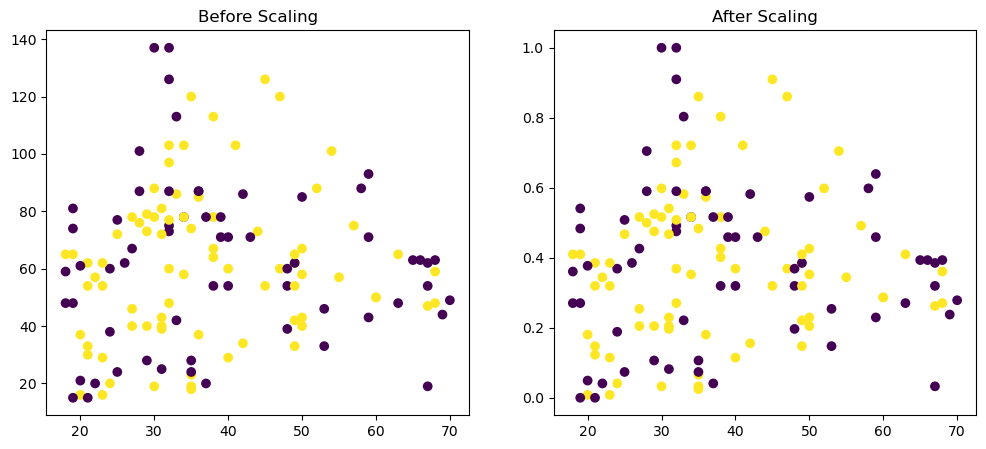

In [288]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.scatter(X_train["Age"],X_train["Annual Income (k$)"], c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train["Age"],X_train_scaled["Annual Income (k$)"], c=y_train)
ax2.set_title("After Scaling")

plt.show()

<Axes: title={'center': 'After Scalling'}, xlabel='Age', ylabel='Density'>

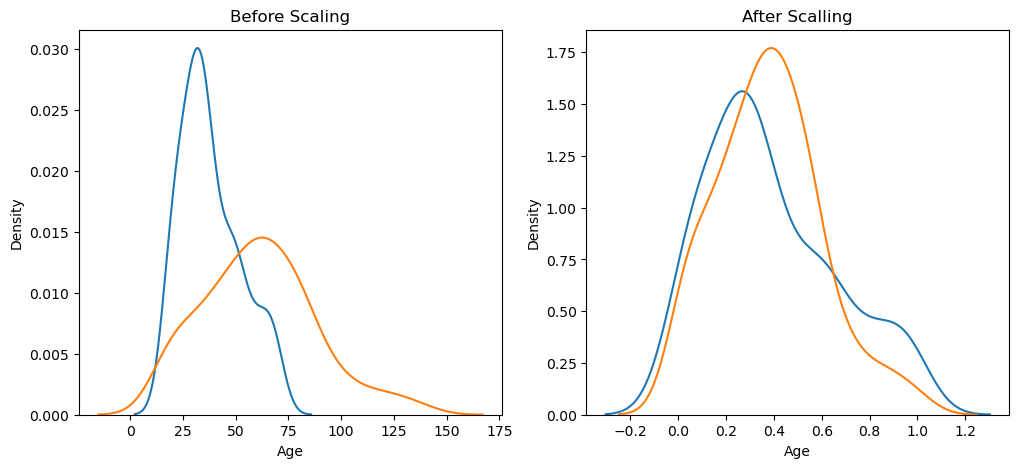

In [289]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
#fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

# before scalling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["Annual Income (k$)"],ax=ax1)

ax2.set_title("After Scalling")
sns.kdeplot(X_train_scaled["Age"],ax =ax2)
sns.kdeplot(X_train_scaled["Annual Income (k$)"])